<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h1>

In [20]:
from scipy.stats import pearsonr, gaussian_kde
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import math


import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("\n----- Libraries Loaded Successfully -----\n")


----- Libraries Loaded Successfully -----



<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>2.0. Load and Inspect Dataset</h1>

In [17]:
if __name__ == "__main__":
    FILEPATH = "./Datasets/Soil Survey Dataset 2025.csv"
    df = pd.read_csv(FILEPATH)
    display(df)

,Site,Ph,Organic Matter %,Nitrogen %,Phosphorus Mg/Kg,Potassium Cmol(+)/Kg,Cec Cmol(+)/Kg,Bulk Density G/Cm3,Electrical Conductivity Ds/M,Yield T/Ha
0,Lowland,6.35,2.45,0.27,20.07,0.47,12.04,1.17,0.18,5.64
1,Lowland,6.44,2.23,0.22,4.31,0.30,6.17,1.24,0.22,4.65
2,Lowland,6.33,2.51,0.15,20.35,0.25,13.03,1.21,0.19,4.40
3,Lowland,6.35,1.97,0.11,5.49,0.35,2.61,1.11,0.21,3.53
4,Lowland,5.86,2.38,0.24,10.12,0.46,11.52,1.20,0.09,4.76
...,...,...,...,...,...,...,...,...,...,...
315,Hillside,6.76,2.30,0.11,6.38,0.28,11.70,1.33,0.25,3.64
316,Hillside,5.54,2.53,0.20,8.42,0.22,10.23,1.31,0.18,4.10
317,Hillside,6.16,1.82,0.18,16.55,0.19,8.71,1.29,0.14,4.20
318,Hillside,6.14,1.48,0.16,1.68,0.28,7.01,1.31,0.32,3.14


In [9]:
def generate_data(seed=0, size=200):
    np.random.seed(seed)
    x = np.random.uniform(-3, 4, size)
    data = {
        'Strong Positive': x + np.random.normal(0, 0.3, size=size),
        'Strong Negative': -x + np.random.normal(0, 0.3, size=size),
        'Weak': 0.3*x + np.random.normal(0, 1, size=size),
        'Nonlinear': 0.2*x**2 + np.random.normal(0, 0.5, size=size)
    }
    return x, data

<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>3.0. Correllation Strength and Directions</h1>

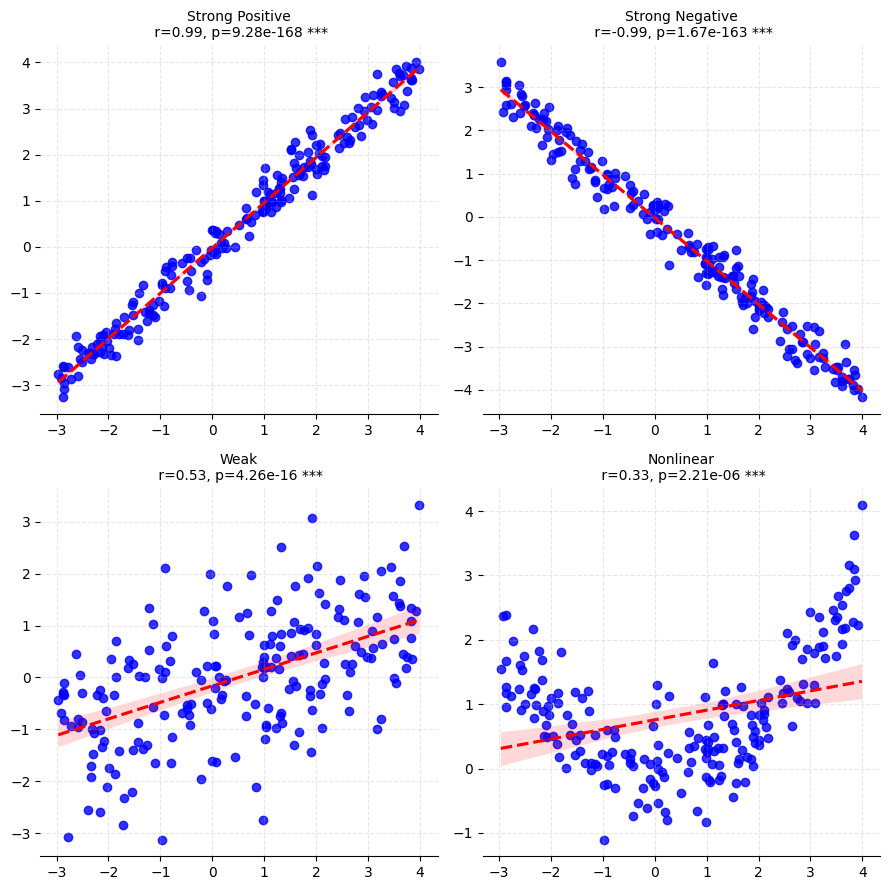

In [14]:
def significance_stars(p):
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'ns'

def plot_subplot(ax, x, y, title, scatter_color='blue', line_color='red'):
    sns.regplot(x=x, y=y, ax=ax, color=scatter_color, line_kws={'color': line_color, 'linestyle':'--'})
    
    r, p = pearsonr(x, y)
    stars = significance_stars(p)
    
    ax.set_title(f"{title}\n r={r:.2f}, p={p:.3g} {stars}", fontsize=10)
    ax.grid(linestyle='--', alpha=0.3)
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

def plot_grid(x, data_dict, ncols=2, figsize=(9, 9)):
    nplots = len(data_dict)
    nrows = math.ceil(nplots / ncols)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten() 
    
    for i, (title, y) in enumerate(data_dict.items()):
        plot_subplot(axes[i], x, y, title)
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    x, data = generate_data()
    plot_grid(x, data)

<h1 style='font-family: Dalton White; font-weight: 600; font-size: 20px; text-align: left'>4.0. Calculate Pearsonr Correlatin Coefficients</h1>

In [18]:
def correlation_matrix(df, method="pearson", visualize=True):
    if method not in [
        'pearson', 
        'spearman', 
        'kendall']: 
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    return corr_matrix

if __name__ == "__main__":
    corr_matrix = correlation_matrix(df, method="pearson")
    display(corr_matrix)

,Ph,Organic Matter %,Nitrogen %,Phosphorus Mg/Kg,Potassium Cmol(+)/Kg,Cec Cmol(+)/Kg,Bulk Density G/Cm3,Electrical Conductivity Ds/M,Yield T/Ha
Ph,1.00,0.20,0.16,0.27,0.20,0.08,-0.21,0.21,0.50
Organic Matter %,0.20,1.00,0.20,0.34,0.19,0.07,-0.25,0.22,0.60
Nitrogen %,0.16,0.20,1.00,0.23,0.17,-0.00,-0.29,0.20,0.73
Phosphorus Mg/Kg,0.27,0.34,0.23,1.00,0.30,0.11,-0.25,0.24,0.51
Potassium Cmol(+)/Kg,0.20,0.19,0.17,0.30,1.00,0.07,-0.27,0.20,0.27
Cec Cmol(+)/Kg,0.08,0.07,-0.00,0.11,0.07,1.00,-0.05,-0.00,0.08
Bulk Density G/Cm3,-0.21,-0.25,-0.29,-0.25,-0.27,-0.05,1.00,-0.17,-0.43
Electrical Conductivity Ds/M,0.21,0.22,0.20,0.24,0.20,-0.00,-0.17,1.00,0.28
Yield T/Ha,0.50,0.60,0.73,0.51,0.27,0.08,-0.43,0.28,1.00


In [16]:
from scipy.stats import pearsonr

def compute_pearson_r(df: pd.DataFrame, numerical_columns: list) -> pd.DataFrame:
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else  "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

if __name__ == "__main__":
    variables = [
         'Organic Matter %',
         'Nitrogen %',
         'Phosphorus Mg/Kg',
         'Potassium Cmol(+)/Kg',
         'Cec Cmol(+)/Kg',
         'Bulk Density G/Cm3',
         'Electrical Conductivity Ds/M',
         'Yield T/Ha'
        ]
    results = compute_pearson_r(df, numerical_columns=variables)
    display(results)


,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,Organic Matter %,Nitrogen %,0.20,0.00,Positive,Weak
1,Organic Matter %,Phosphorus Mg/Kg,0.34,0.00,Positive,Moderate
2,Organic Matter %,Potassium Cmol(+)/Kg,0.19,0.00,Positive,Weak
3,Organic Matter %,Cec Cmol(+)/Kg,0.07,0.24,Positive,Weak
4,Organic Matter %,Bulk Density G/Cm3,-0.25,0.00,Negative,Weak
5,Organic Matter %,Electrical Conductivity Ds/M,0.22,0.00,Positive,Weak
6,Organic Matter %,Yield T/Ha,0.60,0.00,Positive,Moderate
7,Nitrogen %,Phosphorus Mg/Kg,0.23,0.00,Positive,Weak
8,Nitrogen %,Potassium Cmol(+)/Kg,0.17,0.00,Positive,Weak
9,Nitrogen %,Cec Cmol(+)/Kg,-0.00,0.99,Negative,Weak


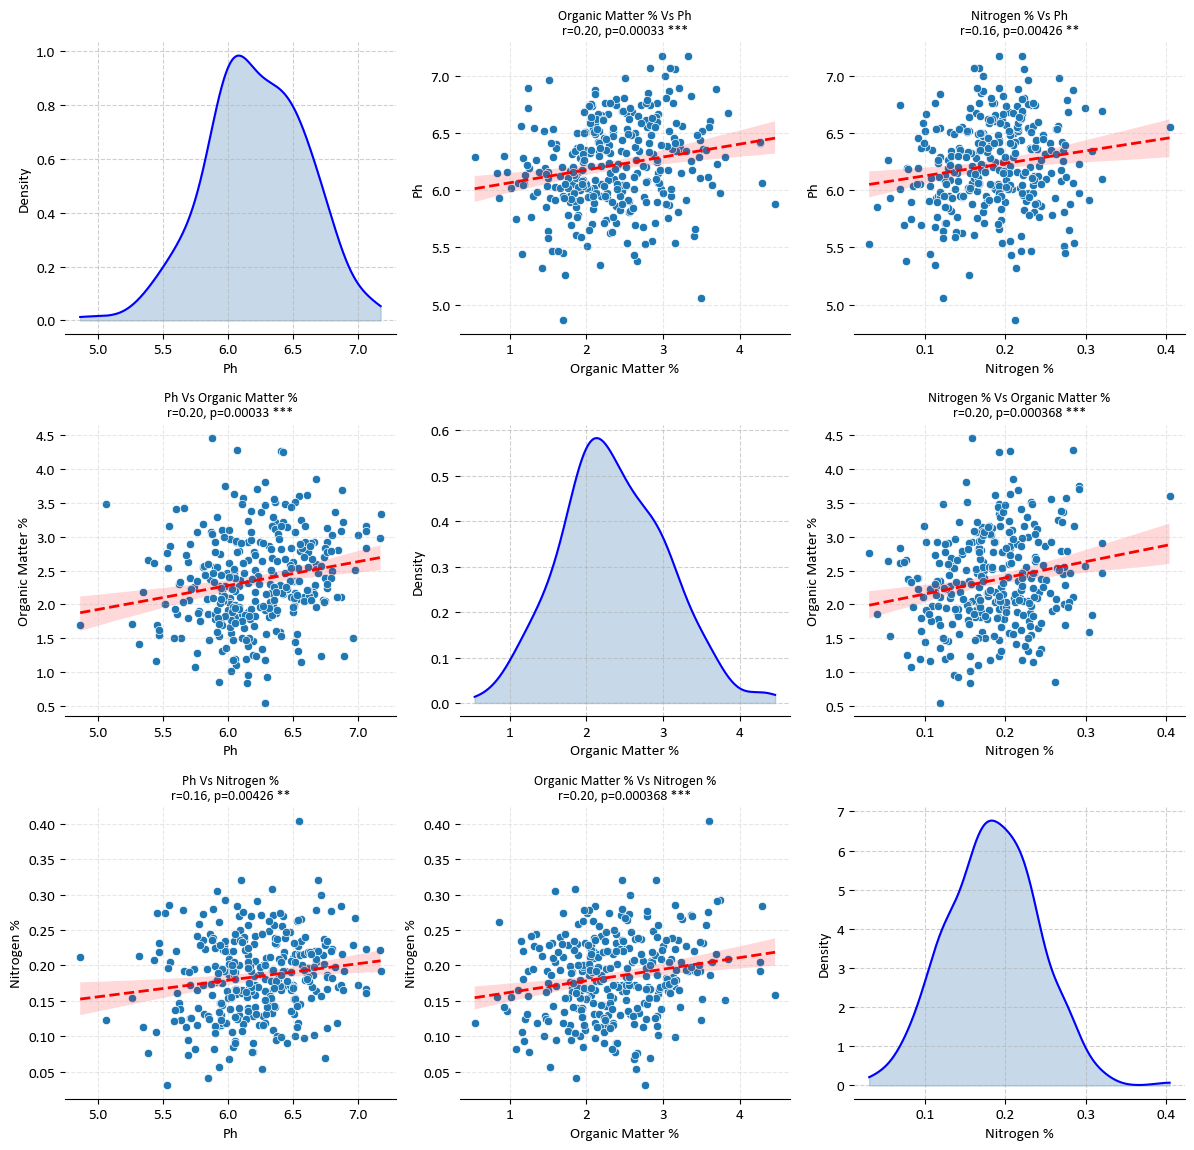

In [22]:
def significance_stars(p):
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'ns'


def visualize_pairplot(df: pd.DataFrame, variables: list, group: str = None, cmap: str = 'viridis'):
    num_variables = len(variables)
    rows = num_variables 
    cols = num_variables
    
    fig, axes = plt.subplots(rows, cols, figsize=(4* cols, 4*rows))
    plt.rcParams.update({'font.family': 'Calibri', 'font.size': 11 })
    
    for i in range(num_variables):
        for j in range(num_variables):
            ax = axes[i, j]
            if i == j:
                if group != None:
                    categories = df[group].unique()
                    cmap_obj = plt.get_cmap(cmap)
                    colors = [cmap_obj(i / len(categories)) for i in range(len(categories))]
                    x_range = np.linspace(df[variables[j]].min(), df[variables[j]].max(), 1000)
                    
                    for sp, color in zip(categories, colors):
                        data = df[df[group] == sp][variables[j]]
                        kde = gaussian_kde(data)
                        ax.plot(x_range, kde(x_range), label=sp, color=color)
                        ax.fill_between(x_range, kde(x_range), alpha=0.3, color=color)  
                        ax.legend(frameon=False)
                        
                else:
                    
                    data = df[variables[j]]
                    kde = gaussian_kde(data)
                    x_range = np.linspace(df[variables[j]].min(), df[variables[j]].max(), 1000)
                    ax.plot(x_range, kde(x_range), color='blue')
                    ax.fill_between(x_range, kde(x_range), alpha=0.3, color='steelblue')
                   
                ax.spines[['right', 'top', 'left']].set_visible(False)
                ax.set_xlabel(variables[j], fontsize=11)
                ax.set_ylabel('Density', fontsize=11)
                ax.grid(linestyle='--', alpha=0.6)
            else:
                r, p = pearsonr(df[variables[j]], df[variables[i]])
                stars = significance_stars(p)
                sns.scatterplot(data=df, x=df[variables[j]], y=df[variables[i]], ax=ax, hue=group, style=group, alpha=1, palette=cmap)
                sns.regplot(data=df, x=df[variables[j]], y=df[variables[i]], ax=ax,  scatter=False, line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
                title = f"{variables[j]} Vs {variables[i]}"
                ax.set_title(f"{title}\nr={r:.2f}, p={p:.3g} {stars}", fontsize=10)
                sns.despine(left=True, bottom=False)
                ax.set_xlabel(variables[j], fontsize=11)
                ax.set_ylabel(variables[i], fontsize=11)
                ax.grid(linestyle='--', alpha=0.3)
                ax.legend(frameon=False)
        
    for i in range(num_variables):
        for j in range(num_variables):
            if i == j:
                axes[i, j].axis('on') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

if __name__ == "__main__":
    variables = df.select_dtypes(include=['number']).columns[:3]
    visualize_pairplot(df, variables)

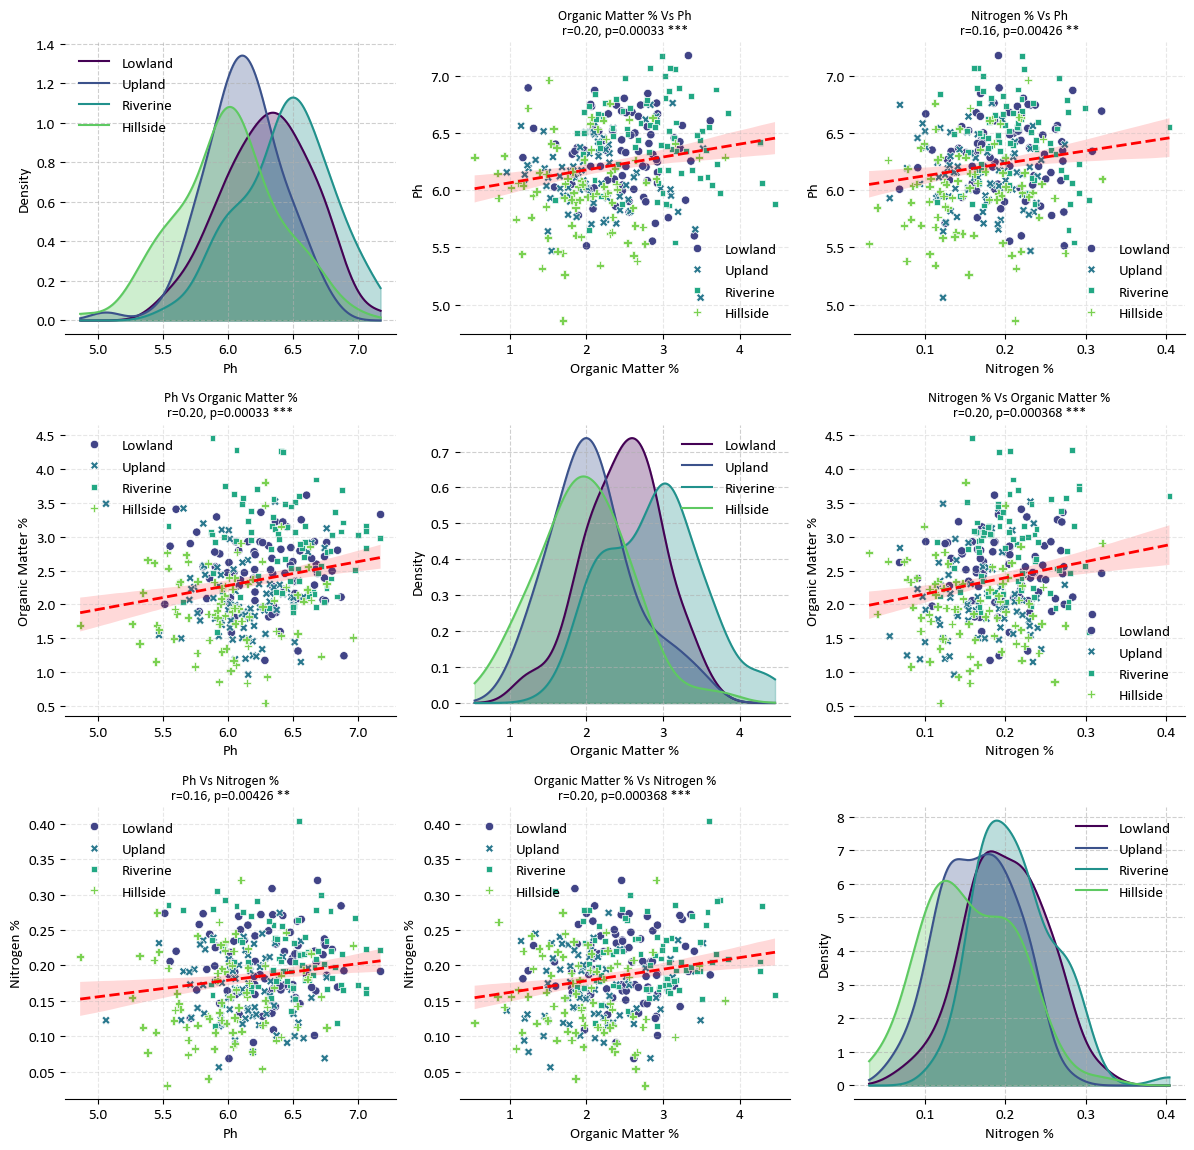

In [23]:
if __name__ == "__main__":
    variables = df.select_dtypes(include=['number']).columns[:3]
    visualize_pairplot(df, variables, group='Site')